In [2]:
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sdv.evaluation.single_table import run_diagnostic
from sdv.metadata import SingleTableMetadata
from sdv.single_table import TVAESynthesizer
from sdv.metadata import SingleTableMetadata
from sdv.evaluation.single_table import get_column_plot
from sdv.evaluation.single_table import get_column_pair_plot
from sdv.evaluation.single_table import evaluate_quality
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

os.chdir('/home/onyxia/work/synthetic-data-sdc/')
os.environ["MLFLOW_TRACKING_URI"] = "https://projet-donnees-synthetiques-mlflow.user.lab.sspcloud.fr/" 

In [5]:
variables = ['sex','age','agegr','placesize','edu','socprof','marital','ls','depress','trust','trustfam','trustneigh','sport','nofriend','smoke','alcabuse','alcsol','wkabint','englang','height','weight','bmi']

var_puf65 = ["AAC","ACTEU","AGE6","ANCCHOM","ANCEMPL4","ANCSSEMP","CHPUB","CL_EMPLOI","COUPL_LOG","DEMNE","DIP7","DISPONE","DISPPLC","ENFRED","EXTRIAN","HALOR","HEFFEMP","HEFFTOT",
           "HHABEMP","HHABTOT","METRODOM","MRANE","MRBNE","MRCNE","MRDNE","MRENE","MRFNE","MRGNE","MRHNE","MRINE","MRJNE","NAFANTG004N","NAFG004UN","NAFG010UN","NAFG017UN",
           "NAFG021UN","NOI","OFFICC","PASTRA","PASTRB","PCS1","PCS1Q","PUB3FP","RABS","RAISDISPPLC","RAISNDISPONE","RAISNRECNE","RAISNSOUNE","RAISTP","RECNE","SALTYP","SEXE",
           "SOU_C","SOUSEMPL","SOUSEMPLR","STATUT","STATUTDET","STC","STCOMM2020","STPLC","TEMP","TPPRED","TRAREF","TXTPPRED","TYPLOG5"]

fac_puf65 = ["AAC","ACTEU","AGE6","ANCCHOM","ANCEMPL4","ANCSSEMP","CHPUB","CL_EMPLOI","COUPL_LOG","DEMNE","DIP7","DISPONE","DISPPLC","ENFRED","HALOR","METRODOM","MRANE","MRBNE",
           "MRCNE","MRDNE","MRENE","MRFNE","MRGNE","MRHNE","MRINE","MRJNE","NAFANTG004N","NAFG004UN","NAFG010UN","NAFG017UN","NAFG021UN","NOI","OFFICC","PASTRA","PASTRB",
           "PCS1","PCS1Q","PUB3FP","RABS","RAISDISPPLC","RAISNDISPONE","RAISNRECNE","RAISNSOUNE","RAISTP","RECNE","SALTYP","SEXE","SOU_C","SOUSEMPL","SOUSEMPLR","STATUT",
           "STATUTDET","STC","STCOMM2020","STPLC","TEMP","TPPRED","TRAREF","TXTPPRED","TYPLOG5"]

var_puf71 = ["AAC","ACTEU","AGE6","ANCCHOM","ANCEMPL4","ANCSSEMP","CHPUB","CL_EMPLOI","COUPL_LOG","DEMNE","DIP7","DISPONE","DISPPLC","ENFRED","EXTRIAN","HALOR","HEFFEMP","HEFFTOT",
           "HHABEMP","HHABTOT","IDENT","ISCO2","METRODOM","MRANE","MRBNE","MRCNE","MRDNE","MRENE","MRFNE","MRGNE","MRHNE","MRINE","MRJNE","NAFANTG004N","NAFANTG088N","NAFG004UN","NAFG010UN","NAFG017UN",
           "NAFG021UN","NAFG038UN","NAFG088UN","NOI","OFFICC","PASTRA","PASTRB","PCS1","PCS1Q","PCS2","PUB3FP","RABS","RAISDISPPLC","RAISNDISPONE","RAISNRECNE","RAISNSOUNE","RAISTP","RECNE","SALTYP","SEXE",
           "SOU_C","SOUSEMPL","SOUSEMPLR","STATUT","STATUTDET","STC","STCOMM2020","STPLC","TEMP","TPPRED","TRAREF","TXTPPRED","TYPLOG5"]

fac_puf71 = ["AAC","ACTEU","AGE6","ANCCHOM","ANCEMPL4","ANCSSEMP","CHPUB","CL_EMPLOI","COUPL_LOG","DEMNE","DIP7","DISPONE","DISPPLC","ENFRED","HALOR","IDENT","ISCO2","METRODOM","MRANE","MRBNE","MRCNE","MRDNE","MRENE","MRFNE","MRGNE","MRHNE","MRINE","MRJNE","NAFANTG004N","NAFANTG088N","NAFG004UN","NAFG010UN","NAFG017UN",
           "NAFG021UN","NAFG038UN","NAFG088UN","NOI","OFFICC","PASTRA","PASTRB","PCS1","PCS1Q","PCS2","PUB3FP","RABS","RAISDISPPLC","RAISNDISPONE","RAISNRECNE","RAISNSOUNE","RAISTP","RECNE","SALTYP","SEXE",
           "SOU_C","SOUSEMPL","SOUSEMPLR","STATUT","STATUTDET","STC","STCOMM2020","STPLC","TEMP","TPPRED","TRAREF","TXTPPRED","TYPLOG5"]

num = ["EXTRIAN", "HEFFEMP", "HEFFTOT", "HHABEMP", "HHABTOT"]

original = pd.read_csv('SDV/df_original.csv', names = variables)
sample = pd.read_csv('SDV/df1_sample.csv', names = variables)
cart = pd.read_csv('SDV/df1_cart.csv', names = variables)
ctree = pd.read_csv('SDV/df1_ctree.csv', names = variables)
parametric = pd.read_csv('SDV/df1_parametric.csv', names = variables)
rf = pd.read_csv('SDV/df1_rf.csv', names = variables)
bag = pd.read_csv('SDV/df1_bag.csv', names = variables)
puf65 = pd.read_csv('TableEvaluator/puf.csv', names = var_puf65)
puf71 = pd.read_csv('SDV/puf71.csv', names = var_puf71)
#puf71_tvae = pd.read_csv('SDV/puf71_tvae.csv', names = var_puf71)

for colonne in num:
    puf65[colonne] = pd.to_numeric(puf65[colonne], errors='coerce')
    
for colonne in fac_puf65:
    puf65[colonne] = puf65[colonne].astype(str)


/tmp/ipykernel_341/722626647.py:31: DtypeWarning: Columns (1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,60,61,62,63,64,65) have mixed types. Specify dtype option on import or set low_memory=False.
  puf65 = pd.read_csv('TableEvaluator/puf.csv', names = var_puf65)
/tmp/ipykernel_341/722626647.py:32: DtypeWarning: Columns (1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,35,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,66,67,68,69,70,71) have mixed types. Specify dtype option on import or set low_memory=False.
  puf71 = pd.read_csv('SDV/puf71.csv', names = var_puf71)


In [6]:
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(puf65)
metadata

{
    "columns": {
        "AAC": {
            "sdtype": "categorical"
        },
        "ACTEU": {
            "sdtype": "categorical"
        },
        "AGE6": {
            "sdtype": "categorical"
        },
        "ANCCHOM": {
            "sdtype": "categorical"
        },
        "ANCEMPL4": {
            "sdtype": "categorical"
        },
        "ANCSSEMP": {
            "sdtype": "categorical"
        },
        "CHPUB": {
            "sdtype": "categorical"
        },
        "CL_EMPLOI": {
            "sdtype": "categorical"
        },
        "COUPL_LOG": {
            "sdtype": "categorical"
        },
        "DEMNE": {
            "sdtype": "categorical"
        },
        "DIP7": {
            "sdtype": "categorical"
        },
        "DISPONE": {
            "sdtype": "categorical"
        },
        "DISPPLC": {
            "sdtype": "categorical"
        },
        "ENFRED": {
            "sdtype": "categorical"
        },
        "EXTRIAN": {
            "sdtype

In [ ]:
tvae = TVAESynthesizer(metadata, verbose=True)
start_time = time.time()
tvae.fit(puf65)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Temps pris pour entraîner le modèle : {elapsed_time} secondes")

start_time1 = time.time()
puf65_tvae = tvae.sample(puf65.shape[0])
end_time1 = time.time()
elapsed_time1 = end_time1 - start_time1
print(f"Temps pris pour générer les données : {elapsed_time1} secondes")



/opt/conda/lib/python3.12/site-packages/sdv/single_table/base.py:92: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Loss: 25.859:   4%|▍         | 13/300 [05:01<1:54:03, 23.85s/it]

In [8]:
puf65_tvae.to_csv("SDV/puf65_tvae.csv")

In [1]:
import joblib

In [ ]:
model_path = "puf65_ctgan.pkl"
joblib.dump(ctgan, model_path)

## Hyperparamètres

- **epochs** et **batch_size** : ces arguments contrôlent le nombre d'itérations que le modèle effectuera pour optimiser ses paramètres, ainsi que le nombre d'échantillons utilisés à chaque étape. Ses valeurs par défaut sont respectivement 300 et 500, et **batch_size doit toujours être une valeur multiple de 10**. Ces hyperparamètres ont un effet très direct sur la durée du processus de formation, mais également sur les performances des données. Ainsi, pour les nouveaux ensembles de données, vous souhaiterez peut-être commencer par définir une valeur faible sur les deux pour voir combien de temps prend le processus de formation. vos données et plus tard, augmentez le nombre à des valeurs acceptables afin d'améliorer les performances.

- **log_frequency** : s'il faut utiliser la log fréquence des modalités catégorieles dans l'échantillonnage conditionnel. La valeur par défaut est True. Cet argument affecte la manière dont le modèle traite les fréquences des valeurs catégorielles utilisées pour conditionner le reste des valeurs. Dans certains cas, le remplacer par False pourrait entraîner de meilleures performances.

- **embedding_dim (int)** : taille de l'échantillon aléatoire transmis au générateur. La valeur par défaut est 128.

- **compress_dims (tuple ou liste d'entiers)** : taille de chaque couche cachée dans l'encodeur. La valeur par défaut est (128, 128).

- **decompress_dims (tuple ou liste d'entiers)** : Taille de chaque couche cachée dans le décodeur. La valeur par défaut est (128, 128).

- **l2scale (int)** : terme de régularisation. La valeur par défaut est 1e-5.

- **batch_size (int)** : nombre d'échantillons de données à traiter à chaque étape.

- **loss_factor (int)** : Multiplicateur de l'erreur de reconstruction. La valeur par défaut est 2.

- **cuda (bool ou str)** : si True, utilisez CUDA. S'il s'agit d'une str, utilisez l'appareil indiqué. Si False, n’utilisez pas du tout cuda.

In [25]:
with open("SDV/config_tvae.yml") as f:
    config = yaml.load(f, Loader=SafeLoader)

class TVAEWrapper(mlflow.pyfunc.PythonModel):
    def __init__(self):
        self.model = None

    def load_context(self, context):
        self.model = joblib.load(context.artifacts["model_path"])

    def predict(self, context, model_input):
        return self.model.sample(len(model_input))

remote_server_uri = os.environ["MLFLOW_TRACKING_URI"]
experiment_name = 'Default'
run_name = 'tvae_bs_10_comp_256_256_decomp_256_256'

mlflow.set_tracking_uri(remote_server_uri)
mlflow.set_experiment(experiment_name)

with mlflow.start_run(run_name=run_name):
    for param_key, param_value in config.items():
        if param_key != 'mlflow':
            mlflow.log_param(param_key, param_value)
    mlflow.log_param('run_name', run_name)

    #Entraînement
    start_time = time.time()
    tvae = TVAESynthesizer(metadata,
                           verbose=True,
                           compress_dims=[1024,1024,1024,1024],
                           decompress_dims=[1024,1024,1024,1024],
                           batch_size=100)
    tvae.fit(original)
    end_time = time.time()
    
    elapsed_time = end_time - start_time
    mlflow.log_metric("elapsed_time", elapsed_time)
    print(f"Temps pris entraîner le modèle : {elapsed_time} secondes")
    
    params_tvae = tvae.get_parameters()

    # Log des paramètres du modèle
    for param_key, param_value in params_tvae.items():
        with mlflow.start_run(nested=True):
            mlflow.log_param(param_key, param_value)

    loss = tvae.get_loss_values()
    losses = loss['Loss'].tolist()
    for epoch, loss in enumerate(losses):
        mlflow.log_metric("loss", loss, step=epoch)

    model_path = "tvae_model.pkl"
    joblib.dump(tvae, model_path)
    mlflow.pyfunc.log_model(
        artifact_path="tvae_model",
        python_model=TVAEWrapper(),
        artifacts={"model_path": model_path},
    )
mlflow.end_run()

Loss: 26.032: 100%|██████████| 300/300 [25:03<00:00,  5.01s/it]


Temps pris entraîner le modèle : 1510.1384444236755 secondes


In [15]:
tvae.get_parameters()

{'enforce_min_max_values': True,
 'enforce_rounding': True,
 'embedding_dim': 128,
 'compress_dims': (128, 128),
 'decompress_dims': (128, 128),
 'l2scale': 1e-05,
 'batch_size': 500,
 'verbose': True,
 'epochs': 500,
 'loss_factor': 2,
 'cuda': True}

## Grid search

In [ ]:
import itertools
import yaml
from yaml.loader import SafeLoader
import mlflow
from sdv.single_table import TVAESynthesizer
import mlflow.pyfunc
import joblib
import os
import time
import pandas as pd

# Charger les configurations du fichier YAML
with open("SDV/config_tvae.yml") as f:
    config = yaml.load(f, Loader=SafeLoader)

class TVAEWrapper(mlflow.pyfunc.PythonModel):
    def __init__(self):
        self.model = None

    def load_context(self, context):
        self.model = joblib.load(context.artifacts["model_path"])

    def predict(self, context, model_input):
        return self.model.sample(len(model_input))

remote_server_uri = os.environ["MLFLOW_TRACKING_URI"]
experiment_name = 'Default'
run_name = 'grid_search'

mlflow.set_tracking_uri(remote_server_uri)
mlflow.set_experiment(experiment_name)

compress_dims_values = config['compress_dims']
decompress_dims_values = config['decompress_dims']
batch_size_values = config['batch_size']

param_combinations = list(itertools.product(compress_dims_values, decompress_dims_values, batch_size_values))

for param_set in param_combinations:
    compress_dims, decompress_dims, batch_size = param_set
    run_name = f"tvae_bs_{batch_size}_comp_dims_{compress_dims}_decomp_dims_{decompress_dims}"

    with mlflow.start_run(run_name=run_name):
        # Log des paramètres de configuration
        mlflow.log_param('compress_dims', compress_dims)
        mlflow.log_param('decompress_dims', decompress_dims)
        mlflow.log_param('batch_size', batch_size)
        
        # Entraînement
        start_time = time.time()
        tvae = TVAESynthesizer(metadata,
                           verbose=True,
                           compress_dims=compress_dims,
                           decompress_dims=decompress_dims,
                           batch_size=batch_size)
        tvae.fit(original)
        end_time = time.time()

        elapsed_time = end_time - start_time
        mlflow.log_metric("elapsed_time", elapsed_time)
        print(f"Temps pris pour entraîner le modèle avec 300 epochs: {elapsed_time} secondes")

        # Log des pertes du générateur et du discriminateur
        loss = tvae.get_loss_values()
        losses = loss['Loss'].tolist()
        for epoch, loss in enumerate(losses):
            mlflow.log_metric("loss", loss, step=epoch)

        # Sauvegarde du modèle
        model_path = f"tvae_model_{run_name}.pkl"
        joblib.dump(tvae, model_path)
        mlflow.pyfunc.log_model(
            artifact_path="tvae_model",
            python_model=TVAEWrapper(),
            artifacts={"model_path": model_path},
        )
    mlflow.end_run()

Loss: 26.079: 100%|██████████| 300/300 [01:14<00:00,  4.05it/s]


Temps pris pour entraîner le modèle avec 300 epochs: 79.12482929229736 secondes


Loss: 24.231: 100%|██████████| 300/300 [01:50<00:00,  2.71it/s]


Temps pris pour entraîner le modèle avec 300 epochs: 115.26674246788025 secondes


Loss: 18.282: 100%|██████████| 300/300 [07:51<00:00,  1.57s/it]


Temps pris pour entraîner le modèle avec 300 epochs: 473.8052124977112 secondes


Loss: 26.965: 100%|██████████| 300/300 [01:08<00:00,  4.36it/s]


Temps pris pour entraîner le modèle avec 300 epochs: 73.23221015930176 secondes


Loss: 23.016: 100%|██████████| 300/300 [01:47<00:00,  2.79it/s]


Temps pris pour entraîner le modèle avec 300 epochs: 111.68123292922974 secondes


Loss: 28.752: 100%|██████████| 300/300 [04:56<00:00,  1.01it/s]


Temps pris pour entraîner le modèle avec 300 epochs: 298.7515199184418 secondes


Loss: 26.560: 100%|██████████| 300/300 [01:12<00:00,  4.16it/s]


Temps pris pour entraîner le modèle avec 300 epochs: 77.18613266944885 secondes


Loss: 20.089: 100%|██████████| 300/300 [01:53<00:00,  2.64it/s]


Temps pris pour entraîner le modèle avec 300 epochs: 117.77101707458496 secondes


Loss: 22.261: 100%|██████████| 300/300 [11:57<00:00,  2.39s/it]


Temps pris pour entraîner le modèle avec 300 epochs: 719.5875782966614 secondes


Loss: 27.760: 100%|██████████| 300/300 [01:20<00:00,  3.71it/s]


Temps pris pour entraîner le modèle avec 300 epochs: 86.1658833026886 secondes


Loss: 28.326: 100%|██████████| 300/300 [01:52<00:00,  2.68it/s]


Temps pris pour entraîner le modèle avec 300 epochs: 116.05274724960327 secondes


Loss: 27.491: 100%|██████████| 300/300 [06:04<00:00,  1.21s/it]


Temps pris pour entraîner le modèle avec 300 epochs: 366.2767605781555 secondes


Loss: 21.600: 100%|██████████| 300/300 [01:21<00:00,  3.69it/s]


Temps pris pour entraîner le modèle avec 300 epochs: 87.3443648815155 secondes


Loss: 18.222: 100%|██████████| 300/300 [01:48<00:00,  2.76it/s]


Temps pris pour entraîner le modèle avec 300 epochs: 113.06883668899536 secondes


Loss: 19.826: 100%|██████████| 300/300 [05:00<00:00,  1.00s/it]


Temps pris pour entraîner le modèle avec 300 epochs: 301.73604464530945 secondes


Loss: 19.865: 100%|██████████| 300/300 [01:15<00:00,  3.97it/s]


Temps pris pour entraîner le modèle avec 300 epochs: 80.91354966163635 secondes


Loss: 14.283: 100%|██████████| 300/300 [01:47<00:00,  2.79it/s]


Temps pris pour entraîner le modèle avec 300 epochs: 111.89073777198792 secondes


Loss: 12.317: 100%|██████████| 300/300 [04:54<00:00,  1.02it/s]


Temps pris pour entraîner le modèle avec 300 epochs: 296.9525349140167 secondes


Loss: 19.018: 100%|██████████| 300/300 [03:37<00:00,  1.38it/s]


Temps pris pour entraîner le modèle avec 300 epochs: 222.67951130867004 secondes


Loss: 12.336: 100%|██████████| 300/300 [09:50<00:00,  1.97s/it]


Temps pris pour entraîner le modèle avec 300 epochs: 595.3841769695282 secondes


Loss: 15.094: 100%|██████████| 300/300 [05:35<00:00,  1.12s/it]


Temps pris pour entraîner le modèle avec 300 epochs: 340.5417742729187 secondes


Loss: 24.683: 100%|██████████| 300/300 [01:13<00:00,  4.06it/s]


Temps pris pour entraîner le modèle avec 300 epochs: 79.32387375831604 secondes


Loss: 24.404: 100%|██████████| 300/300 [09:09<00:00,  1.83s/it]


Temps pris pour entraîner le modèle avec 300 epochs: 553.6137158870697 secondes


Loss: 31.945: 100%|██████████| 300/300 [17:43<00:00,  3.54s/it]


Temps pris pour entraîner le modèle avec 300 epochs: 1068.6984696388245 secondes


Loss: 18.695: 100%|██████████| 300/300 [01:18<00:00,  3.80it/s]


Temps pris pour entraîner le modèle avec 300 epochs: 84.32787132263184 secondes


Loss: 13.467: 100%|██████████| 300/300 [01:55<00:00,  2.61it/s]


Temps pris pour entraîner le modèle avec 300 epochs: 119.38230586051941 secondes


Loss: 20.986: 100%|██████████| 300/300 [09:26<00:00,  1.89s/it]


Temps pris pour entraîner le modèle avec 300 epochs: 568.4229543209076 secondes


Loss: 17.886: 100%|██████████| 300/300 [02:48<00:00,  1.78it/s]


Temps pris pour entraîner le modèle avec 300 epochs: 173.93637132644653 secondes


Loss: 13.043: 100%|██████████| 300/300 [03:45<00:00,  1.33it/s]


Temps pris pour entraîner le modèle avec 300 epochs: 230.029625415802 secondes


Loss: 17.366: 100%|██████████| 300/300 [07:15<00:00,  1.45s/it]


Temps pris pour entraîner le modèle avec 300 epochs: 440.5429081916809 secondes


Loss: 24.610: 100%|██████████| 300/300 [05:32<00:00,  1.11s/it]


Temps pris pour entraîner le modèle avec 300 epochs: 337.7028923034668 secondes


Loss: 13.653: 100%|██████████| 300/300 [02:25<00:00,  2.06it/s]


Temps pris pour entraîner le modèle avec 300 epochs: 150.28030848503113 secondes


Loss: 8.091: 100%|██████████| 300/300 [16:55<00:00,  3.39s/it] 


Temps pris pour entraîner le modèle avec 300 epochs: 1020.8478214740753 secondes


Loss: 25.199: 100%|██████████| 300/300 [01:16<00:00,  3.90it/s]


Temps pris pour entraîner le modèle avec 300 epochs: 82.02880311012268 secondes


Loss: 20.097: 100%|██████████| 300/300 [01:55<00:00,  2.61it/s]


Temps pris pour entraîner le modèle avec 300 epochs: 119.51287984848022 secondes


Loss: 24.558: 100%|██████████| 300/300 [06:51<00:00,  1.37s/it]


Temps pris pour entraîner le modèle avec 300 epochs: 413.59067845344543 secondes


Loss: 24.479: 100%|██████████| 300/300 [01:17<00:00,  3.86it/s]


Temps pris pour entraîner le modèle avec 300 epochs: 82.97265338897705 secondes


Loss: 20.769: 100%|██████████| 300/300 [01:56<00:00,  2.56it/s]


Temps pris pour entraîner le modèle avec 300 epochs: 120.83961701393127 secondes


Loss: 22.103: 100%|██████████| 300/300 [05:26<00:00,  1.09s/it]


Temps pris pour entraîner le modèle avec 300 epochs: 328.7895863056183 secondes


Loss: 23.966: 100%|██████████| 300/300 [01:15<00:00,  3.95it/s]


Temps pris pour entraîner le modèle avec 300 epochs: 81.25122952461243 secondes


Loss: 28.561:  43%|████▎     | 129/300 [00:49<01:08,  2.51it/s]

# Génération de 200 jeux de données avec TVAE pour voir la variabilité des modèles

On fait une boucle pour générer ces 200 jeux de données et récupérer différentes mesures :

1) l'effectif de la modalité "RETIRED" pour la variable "socprof"
2) le coefficient de corrélation de Pearson entre la variable "height" et "weight"
3) l'effectif de la modalité "FEMALE" pour la variable "sex"
4) l'effectif de la modalité "45-59" pour la variable "agegr"
5) la moyenne cumulée des précédentes mesures

In [7]:
import joblib

model_tvae = joblib.load("SDV/tvae_model_tvae_bs_100_comp_dims_[256, 256]_decomp_dims_[256, 256].pkl")


/opt/conda/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator BayesianGaussianMixture from version 1.5.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be a

In [8]:
results_tvae = []

cum_socprof_count_tvae = 0
cum_pearson_corr_tvae = 0
cum_female_count_tvae = 0
cum_age_45_59_count_tvae = 0

avg_socprof_counts_tvae = []
avg_pearson_corrs_tvae = []
avg_female_counts_tvae = []
avg_age_45_59_counts_tvae = []

with open("SDV/Sim_tvae_200.txt", "a") as file:
    for i in range(200):
        syn = model_tvae.sample(original.shape[0])

        socprof_count_tvae = syn['socprof'].value_counts().get('RETIRED', 0)
        pearson_corr_tvae = syn['height'].corr(syn['weight'])
        female_count_tvae = syn['sex'].value_counts().get('FEMALE', 0)
        age_45_59_count_tvae = syn['agegr'].value_counts().get('45-59', 0)

        results_tvae.append([socprof_count_tvae, pearson_corr_tvae, female_count_tvae, age_45_59_count_tvae])

        cum_socprof_count_tvae += socprof_count_tvae
        cum_pearson_corr_tvae += pearson_corr_tvae
        cum_female_count_tvae += female_count_tvae
        cum_age_45_59_count_tvae += age_45_59_count_tvae

        avg_socprof_count_tvae = cum_socprof_count_tvae / (i + 1)
        avg_pearson_corr_tvae = cum_pearson_corr_tvae / (i + 1)
        avg_female_count_tvae = cum_female_count_tvae / (i + 1)
        avg_age_45_59_count_tvae = cum_age_45_59_count_tvae / (i + 1)

        avg_socprof_counts_tvae.append(avg_socprof_count_tvae)
        avg_pearson_corrs_tvae.append(avg_pearson_corr_tvae)
        avg_female_counts_tvae.append(avg_female_count_tvae)
        avg_age_45_59_counts_tvae.append(avg_age_45_59_count_tvae)

        file.write(f"Etape {i+1}:\n")
        file.write(f"Effectif RETIRED: {socprof_count_tvae}\n")
        file.write(f"Moyenne cumulée effectif REITRED: {avg_socprof_count_tvae}\n")
        file.write(f"Coefficient Pearson entre height et weight: {pearson_corr_tvae}\n")
        file.write(f"Moyenne cumulée coefficient Pearson entre height et weight: {avg_pearson_corr_tvae}\n")
        file.write(f"Effectif FEMALE: {female_count_tvae}\n")
        file.write(f"Moyenne cumulée effectif FEMALE: {avg_female_count_tvae}\n")
        file.write(f"Effectif 45-59: {age_45_59_count_tvae}\n")
        file.write(f"Moyenne cumulée effectif 45-59: {avg_age_45_59_count_tvae}\n\n")

        file.flush()


## Graphiques TVAE

/tmp/ipykernel_7090/3258063181.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_7090/3258063181.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_7090/3258063181.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_7090/3258063181.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


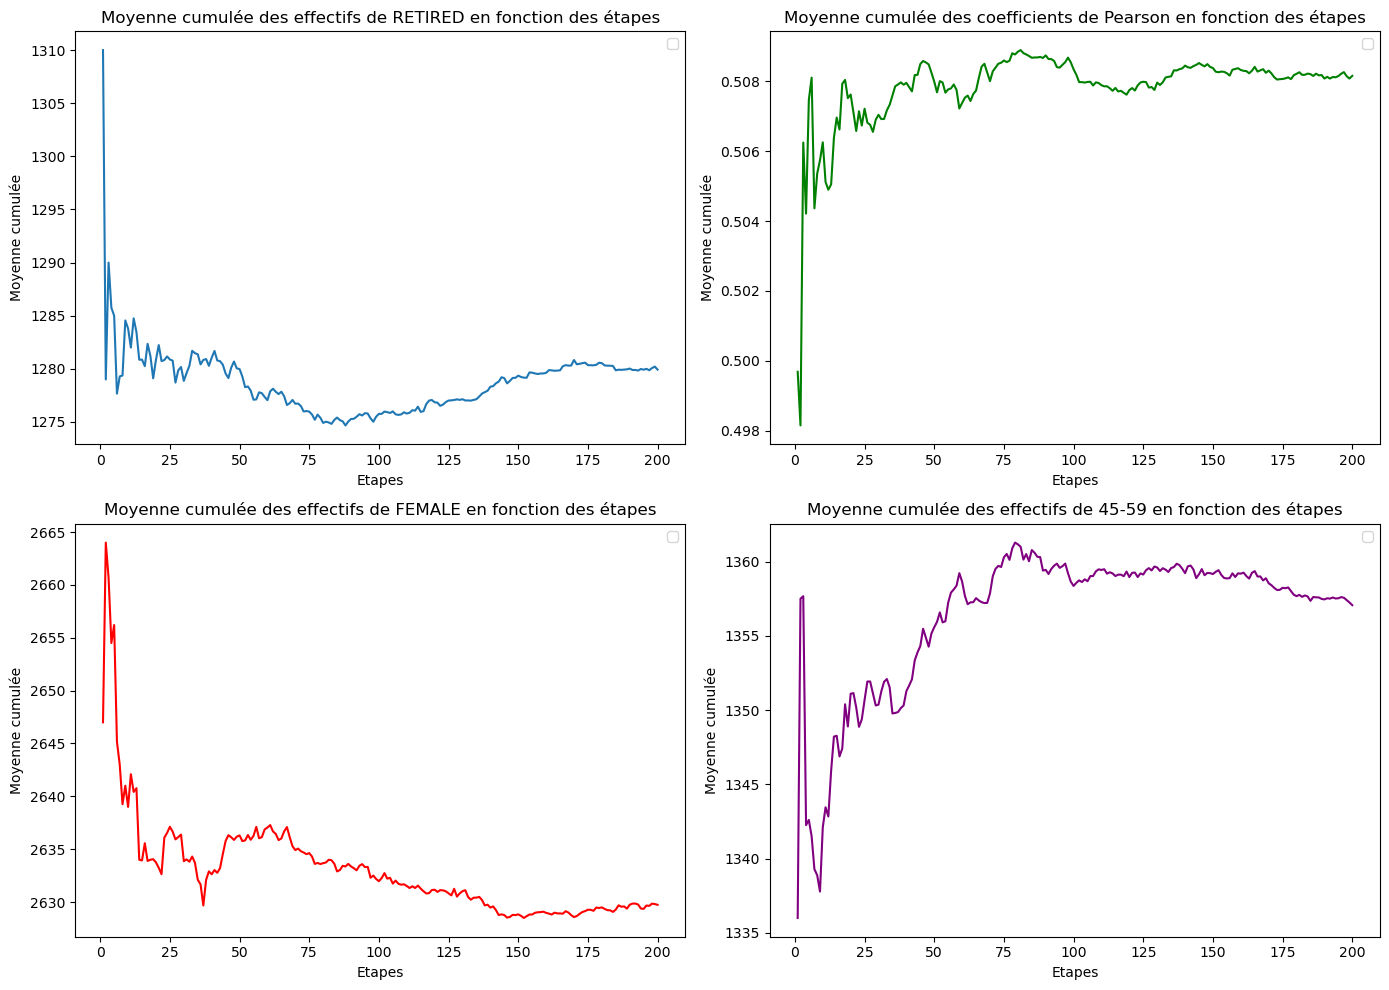

In [9]:
import matplotlib.pyplot as plt

steps = range(1, 201)

plt.figure(figsize=(14, 10))

# Graphique 1 : Moyenne cumulée des effectifs de RETIRED
plt.subplot(2, 2, 1)
plt.plot(steps, avg_socprof_counts_tvae)
plt.xlabel('Etapes')
plt.ylabel('Moyenne cumulée')
plt.title('Moyenne cumulée des effectifs de RETIRED en fonction des étapes')
plt.legend()

# Graphique 2 : Moyenne cumulée des coefficients de Pearson
plt.subplot(2, 2, 2)
plt.plot(steps, avg_pearson_corrs_tvae, color='green')
plt.xlabel('Etapes')
plt.ylabel('Moyenne cumulée')
plt.title('Moyenne cumulée des coefficients de Pearson en fonction des étapes')
plt.legend()

# Graphique 3 : Moyenne cumulée des effectifs de FEMALE
plt.subplot(2, 2, 3)
plt.plot(steps, avg_female_counts_tvae, color='red')
plt.xlabel('Etapes')
plt.ylabel('Moyenne cumulée')
plt.title('Moyenne cumulée des effectifs de FEMALE en fonction des étapes')
plt.legend()

# Graphique 4 : Moyenne cumulée des effectifs de 45-59
plt.subplot(2, 2, 4)
plt.plot(steps, avg_age_45_59_counts_tvae, color='purple')
plt.xlabel('Etapes')
plt.ylabel('Moyenne cumulée')
plt.title('Moyenne cumulée des effectifs de 45-59 en fonction des étapes')
plt.legend()

plt.tight_layout()
plt.show()

On a l'air de voir une sorte de stabilisation vers l'étaps

# Génération de 200 jeux de données avec CTGAN pour voir la variabilité des modèles

In [ ]:
On fait la même chose que prédemment

In [10]:
model_ctgan = joblib.load("SDV/ctgan_model_epochs_500_bs_100_disc_lr_0.0001_gen_lr_0.0001.pkl")


/opt/conda/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator BayesianGaussianMixture from version 1.5.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be a

In [11]:
results_ctgan = []

cum_socprof_count_ctgan = 0
cum_pearson_corr_ctgan = 0
cum_female_count_ctgan = 0
cum_age_45_59_count_ctgan = 0

avg_socprof_counts_ctgan = []
avg_pearson_corrs_ctgan = []
avg_female_counts_ctgan = []
avg_age_45_59_counts_ctgan = []

with open("SDV/Sim_ctgan_200.txt", "a") as file:
    for i in range(200):
        syn = model_ctgan.sample(original.shape[0])

        socprof_count_ctgan = syn['socprof'].value_counts().get('RETIRED', 0)
        pearson_corr_ctgan = syn['height'].corr(syn['weight'])
        female_count_ctgan = syn['sex'].value_counts().get('FEMALE', 0)
        age_45_59_count_ctgan = syn['agegr'].value_counts().get('45-59', 0)

        results_ctgan.append([socprof_count_ctgan, pearson_corr_ctgan, female_count_ctgan, age_45_59_count_ctgan])

        cum_socprof_count_ctgan += socprof_count_ctgan
        cum_pearson_corr_ctgan += pearson_corr_ctgan
        cum_female_count_ctgan += female_count_ctgan
        cum_age_45_59_count_ctgan += age_45_59_count_ctgan

        avg_socprof_count_ctgan = cum_socprof_count_ctgan / (i + 1)
        avg_pearson_corr_ctgan = cum_pearson_corr_ctgan / (i + 1)
        avg_female_count_ctgan = cum_female_count_ctgan / (i + 1)
        avg_age_45_59_count_ctgan = cum_age_45_59_count_ctgan / (i + 1)

        avg_socprof_counts_ctgan.append(avg_socprof_count_ctgan)
        avg_pearson_corrs_ctgan.append(avg_pearson_corr_ctgan)
        avg_female_counts_ctgan.append(avg_female_count_ctgan)
        avg_age_45_59_counts_ctgan.append(avg_age_45_59_count_ctgan)

        file.write(f"Etape {i+1}:\n")
        file.write(f"Effectif RETIRED: {socprof_count_ctgan}\n")
        file.write(f"Moyenne cumulée effectif REITRED: {avg_socprof_count_ctgan}\n")
        file.write(f"Coefficient Pearson entre height et weight: {pearson_corr_ctgan}\n")
        file.write(f"Moyenne cumulée coefficient Pearson entre height et weight: {avg_pearson_corr_ctgan}\n")
        file.write(f"Effectif FEMALE: {female_count_ctgan}\n")
        file.write(f"Moyenne cumulée effectif FEMALE: {avg_female_count_ctgan}\n")
        file.write(f"Effectif 45-59: {age_45_59_count_ctgan}\n")
        file.write(f"Moyenne cumulée effectif 45-59: {avg_age_45_59_count_ctgan}\n\n")

        file.flush()


## Graphiques CTGAN

/tmp/ipykernel_7090/772400702.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_7090/772400702.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_7090/772400702.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_7090/772400702.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


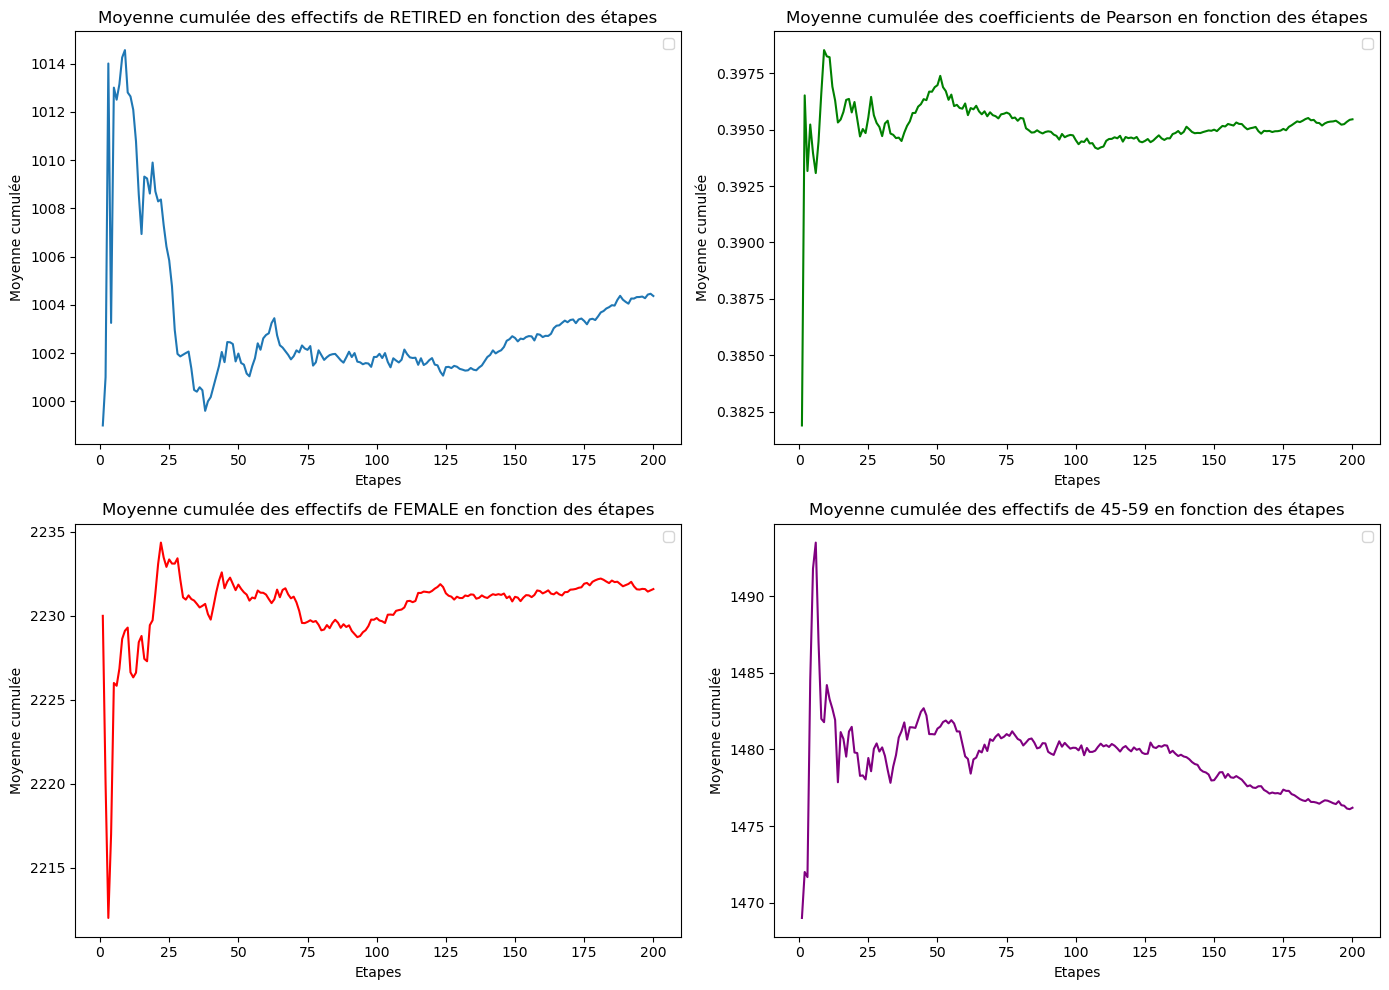

In [12]:
import matplotlib.pyplot as plt

steps = range(1, 201)

plt.figure(figsize=(14, 10))

# Graphique 1 : Moyenne cumulée des effectifs de RETIRED
plt.subplot(2, 2, 1)
plt.plot(steps, avg_socprof_counts_ctgan)
plt.xlabel('Etapes')
plt.ylabel('Moyenne cumulée')
plt.title('Moyenne cumulée des effectifs de RETIRED en fonction des étapes')
plt.legend()

# Graphique 2 : Moyenne cumulée des coefficients de Pearson
plt.subplot(2, 2, 2)
plt.plot(steps, avg_pearson_corrs_ctgan, color='green')
plt.xlabel('Etapes')
plt.ylabel('Moyenne cumulée')
plt.title('Moyenne cumulée des coefficients de Pearson en fonction des étapes')
plt.legend()

# Graphique 3 : Moyenne cumulée des effectifs de FEMALE
plt.subplot(2, 2, 3)
plt.plot(steps, avg_female_counts_ctgan, color='red')
plt.xlabel('Etapes')
plt.ylabel('Moyenne cumulée')
plt.title('Moyenne cumulée des effectifs de FEMALE en fonction des étapes')
plt.legend()

# Graphique 4 : Moyenne cumulée des effectifs de 45-59
plt.subplot(2, 2, 4)
plt.plot(steps, avg_age_45_59_counts_ctgan, color='purple')
plt.xlabel('Etapes')
plt.ylabel('Moyenne cumulée')
plt.title('Moyenne cumulée des effectifs de 45-59 en fonction des étapes')
plt.legend()

plt.tight_layout()
plt.show()

On ne constate pas réellement de stabilisation. Il faudrait donc faire plus de simulations.